In [1]:
import os
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from toolsets.feature_alignment import find_istd, clean_bad_features, find_feature
from toolsets.search import quick_search_values

In [17]:
tt = os.path.join(working_dir, 'alignment_result2.csv')

In [18]:
os.path.dirname(tt)

'/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/brighseed/result'

In [11]:
working_dir ='/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/brighseed/result'
# istd_info = pd.read_csv('/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/brighseed/istd_info.csv')
alignment_result = pd.read_csv(os.path.join(working_dir, 'alignment_result2.csv'))
alignment_result.sort_values(by = 'rt', ascending=True, inplace = True, ignore_index=True)
# alignment_result = find_istd(alignment_result, istd_info)

In [3]:
bio_data = pd.read_csv('/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/brighseed/bio_data/H2L 1870 AX Round 4 bioactivity data.csv')
bio_data.dropna(how='all', axis = 1, inplace=True)
bio_data.dropna(how='all', axis = 0, inplace=True)
sample_id_pos = []
sample_id_neg = []
average = []
for index, row in bio_data.iterrows():
    sample_id_pos.append(row['sampleID']+'_P')
    sample_id_neg.append(row['sampleID']+'_N')
    if row['average'] >100:
        average.append(100)
    else:
        average.append(row['average'])
bio_data['adjusted_average']=average
bio_data.insert(2, 'sample_id_pos', sample_id_pos)
bio_data.insert(3, 'sample_id_neg', sample_id_neg)

In [148]:
import seaborn as sns

In [4]:
from toolsets.helpers import find_common_items
common_col_name = find_common_items([bio_data['sample_id_pos'], alignment_result.columns])

In [5]:
bio_data_refined = bio_data[bio_data['sample_id_pos'].isin(common_col_name) ]

In [12]:
alignment_result[bio_data_refined['sample_id_pos']]=alignment_result[bio_data_refined['sample_id_pos']]

In [339]:
idx_list = []
for index, row in alignment_result_sample.iterrows():
    if np.argmax(row.values)==alignment_result_sample.columns.get_loc("1870_AX_M5P2_M7P1_M7_X32_P"):
        idx_list.append(index)
    # break

In [342]:
len(idx_list)

1237

In [336]:
alignment_result_sample

,1870_AX_M5P2_M7P1_M7_X24_P,1870_AX_M5P2_M7P1_M7_X25_P,1870_AX_M5P2_M7P1_M7_X26_P,1870_AX_M5P2_M7P1_M7_X27_P,1870_AX_M5P2_M7P1_M7_X28_P,1870_AX_M5P2_M7P1_M7_X29_P,1870_AX_M5P2_M7P1_M7_X31_P,1870_AX_M5P2_M7P1_M7_X32_P,1870_AX_M5P2_M7P1_M7_X33_P,1870_AX_M5P2_M7P1_M7_X34_P,...,1870_AX_M5P2_M7P1_M7_X50_P,1870_AX_M5P2_M7P1_M7_X51_P,1870_AX_M5P2_M7P1_M7_X52_P,1870_AX_M5P2_M7P1_M7_X53_P,1870_AX_M5P2_M7P1_M7_X54_P,1870_AX_M5P2_M7P1_M7_X55_P,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35698,257675.140625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206910.984375,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172342.5625,0.0
35699,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
35700,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
35701,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0


In [338]:
alignment_result_sample.columns.get_loc("1870_AX_M5P2_M7P1_M7_X32_P")

7

In [161]:
x = alignment_result_sample.transpose()

In [165]:
mz_rt_feature = alignment_result['pmz'].astype(str)+'_'+alignment_result['rt'].astype(str)

In [166]:
x.columns = mz_rt_feature

In [231]:
correlation = []
p_values = []
for index, row in alignment_result_sample.iterrows():
    temp = (pearsonr(row.values, bio_data_refined['adjusted_average']))
    if temp[0]!=temp[0]: # this is nan
        correlation.append(0)
        p_values.append(0)
    else:
        correlation.append(temp[0])
        p_values.append(temp[1])
alignment_result_correlation = alignment_result.copy()
alignment_result_correlation.insert(2, 'correlation', correlation)
alignment_result_correlation.insert(3, 'p_value', p_values)
alignment_result_correlation.sort_values(by = 'correlation', ascending=True, inplace=True)
    # brea

/Users/fanzhou.kong/miniconda3/envs/alphapept_env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [175]:
feature_filter_idx = np.where(np.array(correlation) < 0)

In [218]:
alignment_result_sample

,1870_AX_M5P2_M7P1_M7_X24_P,1870_AX_M5P2_M7P1_M7_X25_P,1870_AX_M5P2_M7P1_M7_X26_P,1870_AX_M5P2_M7P1_M7_X27_P,1870_AX_M5P2_M7P1_M7_X28_P,1870_AX_M5P2_M7P1_M7_X29_P,1870_AX_M5P2_M7P1_M7_X31_P,1870_AX_M5P2_M7P1_M7_X32_P,1870_AX_M5P2_M7P1_M7_X33_P,1870_AX_M5P2_M7P1_M7_X34_P,...,1870_AX_M5P2_M7P1_M7_X50_P,1870_AX_M5P2_M7P1_M7_X51_P,1870_AX_M5P2_M7P1_M7_X52_P,1870_AX_M5P2_M7P1_M7_X53_P,1870_AX_M5P2_M7P1_M7_X54_P,1870_AX_M5P2_M7P1_M7_X55_P,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35698,257675.140625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206910.984375,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172342.5625,0.0
35699,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
35700,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
35701,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0


In [183]:
list(feature_filter_idx)

[array([   10,    14,    16, ..., 35695, 35698, 35699])]

In [188]:
x_subset = x.iloc[:,feature_filter_idx[0].tolist()]

In [189]:
x_subset

,261.2212_0.53899822,105.2839_0.53899822,280.2351_0.53899822,100.9668_0.53899822,178.9458_0.53899822,133.9746_0.53899822,111.9681_0.53899822,109.1011_0.53899822,239.2367_0.53899822,237.9359_0.53899822,...,796.6311_9.94503159,824.6336_9.94503159,1115.918_9.9458382,988.7937_9.954012,904.7344_9.96393659,905.744_9.96393659,1116.914_9.96393659,1047.854_9.96393659,742.617_9.972241,755.6222_9.972241
1870_AX_M5P2_M7P1_M7_X24_P,0.000000,0.000000,0.000000,36368.914062,0.000000,15457.080078,40667.917969,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,257675.140625,0.0000
1870_AX_M5P2_M7P1_M7_X25_P,0.000000,0.000000,114338.460938,0.000000,0.000000,51056.773438,0.000000,63475.035156,67910.875000,0.000000,...,0.000000,0.000000,277378.843750,361163.500000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000
1870_AX_M5P2_M7P1_M7_X26_P,0.000000,0.000000,0.000000,0.000000,0.000000,22686.521484,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000
1870_AX_M5P2_M7P1_M7_X27_P,0.000000,0.000000,88194.601562,0.000000,0.000000,11966.289062,0.000000,0.000000,51288.160156,4549.472656,...,0.000000,31960.251953,0.000000,0.000000,0.000000,0.0000,109330.984375,0.0000,0.000000,0.0000
1870_AX_M5P2_M7P1_M7_X28_P,0.000000,0.000000,0.000000,0.000000,0.000000,24351.400391,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,128438.578125,0.0000,0.000000,0.0000,0.000000,0.0000
1870_AX_M5P2_M7P1_M7_X29_P,0.000000,0.000000,0.000000,0.000000,0.000000,13314.710938,0.000000,0.000000,0.000000,5457.999512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000
1870_AX_M5P2_M7P1_M7_X31_P,0.000000,12850.108398,0.000000,0.000000,0.000000,36095.351562,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229053.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000
1870_AX_M5P2_M7P1_M7_X32_P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,73891.078125,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,288330.6875,0.000000,0.0000
1870_AX_M5P2_M7P1_M7_X33_P,0.000000,0.000000,66698.648438,0.000000,0.000000,34574.117188,44088.089844,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,206910.984375,0.0000
1870_AX_M5P2_M7P1_M7_X34_P,0.000000,0.000000,0.000000,0.000000,0.000000,11611.171875,0.000000,51016.546875,46412.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000


In [191]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [207]:
y = bio_data_refined['adjusted_average']

In [213]:
rf.fit(x_subset, y)

RandomForestRegressor()

In [273]:
rf.score(x_subset, y)

0.9255904006582842

In [216]:
feature_importance_table = pd.DataFrame(zip(x_subset.columns, rf.feature_importances_), columns=['mzrt', 'importance'])
feature_importance_table.sort_values(by = 'importance', ascending=False, inplace=True)
feature_importance_table

,mzrt,importance
5891,487.1628_5.73458,0.087186
4965,353.2302_4.835605,0.044537
3379,109.101_3.545513,0.035041
5449,353.2303_5.244967,0.034807
5050,428.2707_4.927507,0.034522
...,...,...
3741,820.3304_3.86081541,0.000000
3742,304.2469_3.86081541,0.000000
3743,104.0704_3.87653584,0.000000
3744,557.3149_3.87653584,0.000000


In [226]:
mz_rt_feature = np.array(feature_importance_table.iloc[0]['mzrt'].split('_'), dtype = float)

In [228]:
mz_rt_feature[1]

5.73458

In [254]:
def quick_draw_from_mzrtvip(row):
    mz_rt_feature = np.array(row['mzrt'].split('_'), dtype = float)
    pmz = mz_rt_feature[0]
    rt = mz_rt_feature[1]
    temp = find_feature(alignment_result_correlation, mz = pmz, rt = rt, mz_column='pmz', rt_column='rt')
    # return(temp)
    index = temp.index[0]

    y = [x/np.max(alignment_result_correlation_adjusted.loc[index][6:])*100 for x in alignment_result_correlation_adjusted.loc[index][6:]]
    fig, axs = plt.subplots(figsize = (10,6))
    sns.lineplot(x = bio_data_refined['sampleID'].str[-2:], y = y )

    sns.lineplot(x = bio_data_refined['sampleID'].str[-2:], y = bio_data_refined['adjusted_average'])
    plt.title(str(pmz)+'+'+str(rt))

In [266]:
pmz_list = []
rt_list =[]
for index, row in feature_importance_table.iterrows():
    mz_rt_feature = np.array(row['mzrt'].split('_'), dtype = float)
    pmz = mz_rt_feature[0]
    rt = mz_rt_feature[1]
    pmz_list.append(pmz)
    rt_list.append(rt)
feature_importance_table.insert(1,'pmz', pmz_list)
feature_importance_table.insert(2, 'rt', rt_list)

In [267]:
feature_importance_table.reset_index(drop=True, inplace=True)

In [279]:
feature_importance_table.to_csv(os.path.join(working_dir, 'random_forest_vip.csv'), index = False)

In [281]:
feature_importance_table['importance'].sum()

1.0

In [276]:
find_feature(feature_importance_table, mz = 465.1808, rt = 5.73, mz_column='pmz', rt_column='rt')

,mzrt,pmz,rt,importance
5,465.1808_5.7330256,465.1808,5.733026,0.034486


In [275]:
find_feature(feature_importance_table, mz = 449.11048, rt = 3.186, mz_column='pmz', rt_column='rt')

,mzrt,pmz,rt,importance


In [282]:
feature_importance_table

,mzrt,pmz,rt,importance
0,487.1628_5.73458,487.1628,5.734580,0.087186
1,353.2302_4.835605,353.2302,4.835605,0.044537
2,109.101_3.545513,109.1010,3.545513,0.035041
3,353.2303_5.244967,353.2303,5.244967,0.034807
4,428.2707_4.927507,428.2707,4.927507,0.034522
...,...,...,...,...
10897,820.3304_3.86081541,820.3304,3.860815,0.000000
10898,304.2469_3.86081541,304.2469,3.860815,0.000000
10899,104.0704_3.87653584,104.0704,3.876536,0.000000
10900,557.3149_3.87653584,557.3149,3.876536,0.000000


In [308]:
target_id = '1870_AX_M5P2_M7P1_M7_X32_P'

In [ ]:
for index, row in alignment_result

In [87]:
alignment_result_correlation.to_csv(os.path.join(working_dir, 'correlation_no_deisotoping.csv'), index = False)

In [88]:
col_names  = alignment_result_correlation.columns[0:6].tolist()+bio_data_refined['sample_id_pos'].tolist()

In [202]:
alignment_result_correlation_adjusted = alignment_result_correlation[col_names]

In [72]:
from toolsets.constants import single_charged_adduct_mass

In [119]:
from toolsets.search import string_search

In [120]:
string_search(alignment_result_correlation_adjusted, 'feature_type', 'istd')

,pmz,rt,correlation,p_value,annotation,feature_type,1870_AX_M5P2_M7P1_M7_X24_P,1870_AX_M5P2_M7P1_M7_X25_P,1870_AX_M5P2_M7P1_M7_X26_P,1870_AX_M5P2_M7P1_M7_X27_P,...,1870_AX_M5P2_M7P1_M7_X50_P,1870_AX_M5P2_M7P1_M7_X51_P,1870_AX_M5P2_M7P1_M7_X52_P,1870_AX_M5P2_M7P1_M7_X53_P,1870_AX_M5P2_M7P1_M7_X54_P,1870_AX_M5P2_M7P1_M7_X55_P,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P
0,426.3043,8.027907,-0.325371,5.648478e-02,C19-APS,istd,1.095154e+07,1.052113e+07,1.111553e+07,1.128647e+07,...,9.092835e+06,1.075724e+07,1.063276e+07,1.043864e+07,1.140887e+07,1.126384e+07,1.011440e+07,1.036099e+07,1.003902e+07,9.951489e+06
1,412.2883,7.736041,-0.238234,1.681533e-01,C18-APS,istd,1.162642e+07,1.044615e+07,1.072904e+07,1.078745e+07,...,8.529275e+06,1.044682e+07,1.103313e+07,1.000626e+07,1.058735e+07,9.761606e+06,1.115533e+07,1.172922e+07,9.125893e+06,9.449614e+06
2,356.2257,6.398995,-0.195991,2.591608e-01,C14-APS,istd,9.557322e+06,8.419671e+06,8.425654e+06,7.954422e+06,...,6.311426e+06,6.994084e+06,7.232566e+06,7.325431e+06,7.489066e+06,7.122846e+06,7.165583e+06,6.984030e+06,6.787450e+06,7.309370e+06
3,370.2414,6.755098,-0.071982,6.811319e-01,C15-APS,istd,8.090800e+06,8.117543e+06,7.706715e+06,8.198900e+06,...,6.525829e+06,7.118047e+06,7.685886e+06,7.309382e+06,8.188798e+06,8.060500e+06,7.340304e+06,7.249668e+06,7.106205e+06,7.036908e+06
4,440.3199,8.301512,-0.044236,8.007911e-01,C20-APS,istd,1.173069e+07,1.107263e+07,1.386190e+07,1.041582e+07,...,9.688888e+06,1.317582e+07,1.138355e+07,1.145272e+07,1.297505e+07,1.148948e+07,1.494492e+07,1.317040e+07,1.227995e+07,1.133477e+07
5,384.2569,7.087379,0.013062,9.406330e-01,C16-APS,istd,8.518607e+06,7.809082e+06,7.889912e+06,8.268087e+06,...,6.883288e+06,8.263280e+06,8.617981e+06,8.025299e+06,9.103687e+06,8.937155e+06,8.599703e+06,8.514743e+06,7.540920e+06,8.150624e+06
6,328.1944,5.662528,0.032973,8.508469e-01,C12-APS,istd,4.931937e+06,4.492510e+06,4.697533e+06,4.445760e+06,...,3.882154e+06,4.841326e+06,4.410949e+06,4.440588e+06,4.902203e+06,4.489348e+06,4.492560e+06,4.380912e+06,4.316872e+06,4.562422e+06
7,398.2727,7.415062,0.110161,5.287120e-01,C17-APS,istd,1.018657e+07,1.014496e+07,9.146874e+06,8.494662e+06,...,8.309456e+06,9.351788e+06,9.588512e+06,9.343129e+06,1.048584e+07,1.186198e+07,9.988883e+06,9.789727e+06,8.960806e+06,8.938445e+06
8,216.0689,1.060219,0.180888,2.983908e-01,C4-APS,istd,4.221623e+05,3.936113e+05,3.701605e+05,3.854578e+05,...,3.092321e+05,3.589855e+05,3.530673e+05,3.722708e+05,4.272957e+05,3.688457e+05,3.685301e+05,3.541618e+05,3.359163e+05,3.522096e+05
9,342.2100,6.041216,0.242489,1.604587e-01,C13-APS,istd,8.323947e+06,6.960630e+06,7.686078e+06,8.036616e+06,...,6.392854e+06,7.510468e+06,7.494710e+06,6.937284e+06,7.825871e+06,6.908208e+06,7.759618e+06,7.228556e+06,7.121219e+06,7.239814e+06


In [127]:
find_feature(alignment_result_correlation_adjusted, mz = 449.1083, rt = 3.21, mz_column='pmz', rt_column='rt')

,pmz,rt,correlation,p_value,annotation,feature_type,1870_AX_M5P2_M7P1_M7_X24_P,1870_AX_M5P2_M7P1_M7_X25_P,1870_AX_M5P2_M7P1_M7_X26_P,1870_AX_M5P2_M7P1_M7_X27_P,...,1870_AX_M5P2_M7P1_M7_X50_P,1870_AX_M5P2_M7P1_M7_X51_P,1870_AX_M5P2_M7P1_M7_X52_P,1870_AX_M5P2_M7P1_M7_X53_P,1870_AX_M5P2_M7P1_M7_X54_P,1870_AX_M5P2_M7P1_M7_X55_P,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P
6755,449.1075,3.203174,-0.554019,0.000555,unknown,compound,0.0,0.0,0.0,0.0,...,166995.0625,57383.589844,26337.59375,20217.927734,16120.515625,16413.837891,12724.520508,14230.623047,9358.921875,12894.623047


In [116]:
alignment_result_correlation_adjusted['correlation'].quantile(0.001)

-0.7655155270983445

In [123]:
alignment_result_correlation_adjusted.loc[index]

pmz                                449.1075
rt                                 3.203174
correlation                       -0.554019
p_value                            0.000555
annotation                          unknown
feature_type                       compound
1870_AX_M5P2_M7P1_M7_X24_P              0.0
1870_AX_M5P2_M7P1_M7_X25_P              0.0
1870_AX_M5P2_M7P1_M7_X26_P              0.0
1870_AX_M5P2_M7P1_M7_X27_P              0.0
1870_AX_M5P2_M7P1_M7_X28_P              0.0
1870_AX_M5P2_M7P1_M7_X29_P              0.0
1870_AX_M5P2_M7P1_M7_X31_P              0.0
1870_AX_M5P2_M7P1_M7_X32_P       24796254.0
1870_AX_M5P2_M7P1_M7_X33_P       17649800.0
1870_AX_M5P2_M7P1_M7_X34_P              0.0
1870_AX_M5P2_M7P1_M7_X35_P              0.0
1870_AX_M5P2_M7P1_M7_X36_P              0.0
1870_AX_M5P2_M7P1_M7_X37_P              0.0
1870_AX_M5P2_M7P1_M7_X38_P              0.0
1870_AX_M5P2_M7P1_M7_X39_P              0.0
1870_AX_M5P2_M7P1_M7_X40_P              0.0
1870_AX_M5P2_M7P1_M7_X41_P      

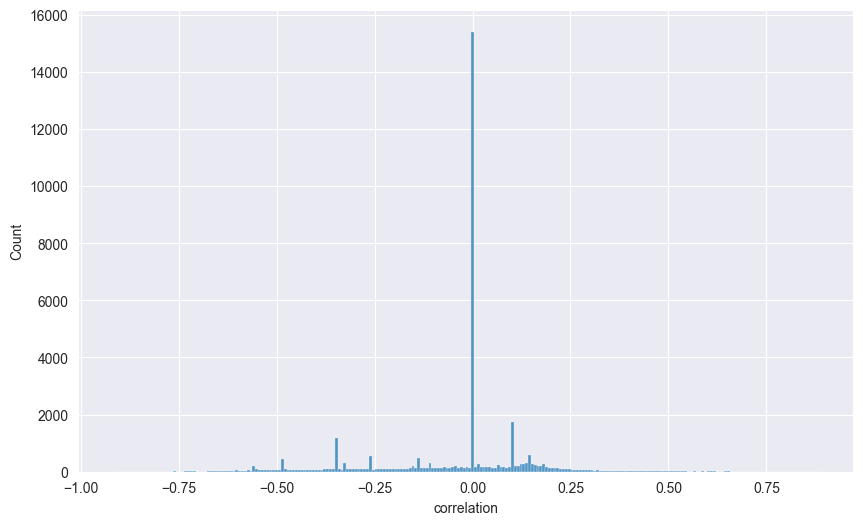

In [115]:
fig, axs = plt.subplots(figsize = (10,6))
sns.histplot(alignment_result_correlation_adjusted['correlation'])
fig.savefig(os.path.join(working_dir, 'distribution'+'.png'))

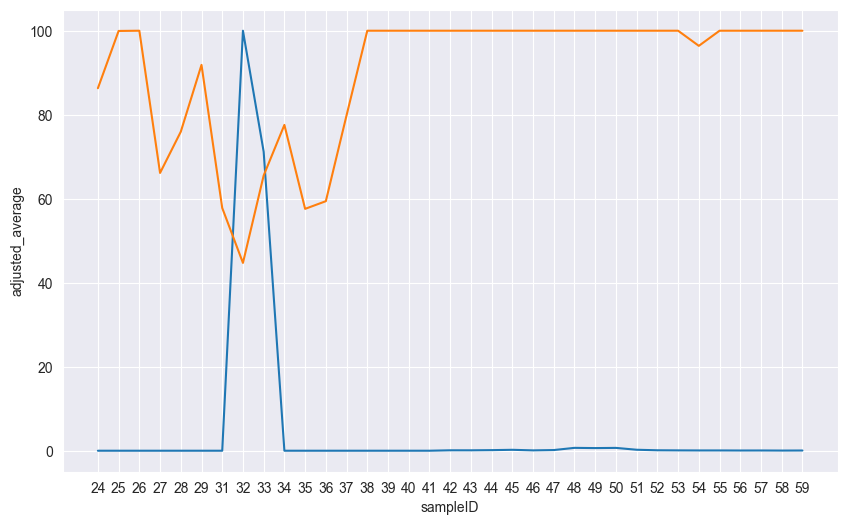

In [124]:
index = 6755
y = [x/np.max(alignment_result_correlation_adjusted.loc[index][6:])*100 for x in alignment_result_correlation_adjusted.loc[index][6:]]
fig, axs = plt.subplots(figsize = (10,6))
sns.lineplot(x = bio_data_refined['sampleID'].str[-2:], y = y )

sns.lineplot(x = bio_data_refined['sampleID'].str[-2:], y = bio_data_refined['adjusted_average'])
# fig.savefig(os.path.join(working_dir, str(alignment_result_correlation_adjusted.loc[index]['pmz'])+'_'+str(alignment_result_correlation_adjusted.loc[index]['rt'])+'.png'))

In [131]:
find_feature(alignment_result_correlation_adjusted, mz = 437.21275, rt =4.086, mz_column='pmz', rt_column='rt')

,pmz,rt,correlation,p_value,annotation,feature_type,1870_AX_M5P2_M7P1_M7_X24_P,1870_AX_M5P2_M7P1_M7_X25_P,1870_AX_M5P2_M7P1_M7_X26_P,1870_AX_M5P2_M7P1_M7_X27_P,...,1870_AX_M5P2_M7P1_M7_X50_P,1870_AX_M5P2_M7P1_M7_X51_P,1870_AX_M5P2_M7P1_M7_X52_P,1870_AX_M5P2_M7P1_M7_X53_P,1870_AX_M5P2_M7P1_M7_X54_P,1870_AX_M5P2_M7P1_M7_X55_P,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P
12463,437.2151,4.076977,-0.618509,0.000075,unknown,compound,0.0,0.0,0.0,0.0,...,607474.75,223738.40625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40608.589844


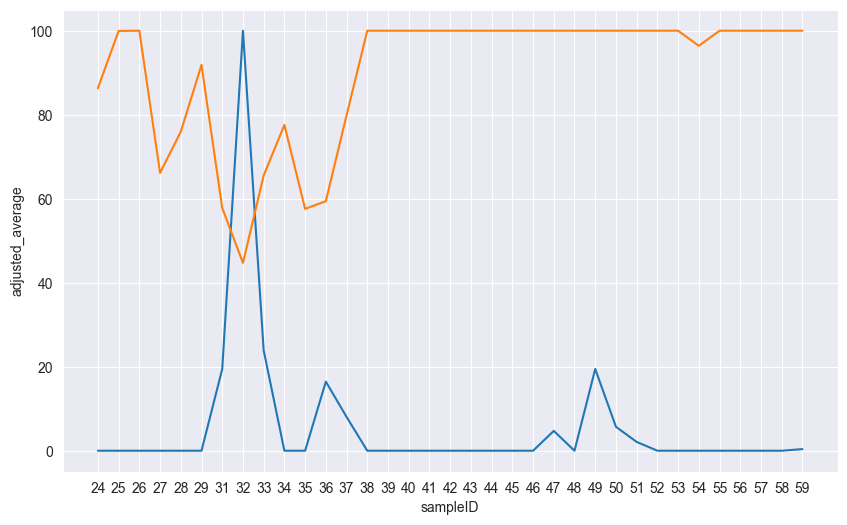

In [132]:
index = 12463
y = [x/np.max(alignment_result_correlation_adjusted.loc[index][6:])*100 for x in alignment_result_correlation_adjusted.loc[index][6:]]
fig, axs = plt.subplots(figsize = (10,6))
sns.lineplot(x = bio_data_refined['sampleID'].str[-2:], y = y )

sns.lineplot(x = bio_data_refined['sampleID'].str[-2:], y = bio_data_refined['adjusted_average'])
fig.savefig(os.path.join(working_dir, str(alignment_result_correlation_adjusted.loc[index]['pmz'])+'_'+str(alignment_result_correlation_adjusted.loc[index]['rt'])+'.png'))

In [133]:
find_feature(alignment_result_correlation_adjusted, mz = 265.14343, rt =3.371, mz_column='pmz', rt_column='rt')

,pmz,rt,correlation,p_value,annotation,feature_type,1870_AX_M5P2_M7P1_M7_X24_P,1870_AX_M5P2_M7P1_M7_X25_P,1870_AX_M5P2_M7P1_M7_X26_P,1870_AX_M5P2_M7P1_M7_X27_P,...,1870_AX_M5P2_M7P1_M7_X50_P,1870_AX_M5P2_M7P1_M7_X51_P,1870_AX_M5P2_M7P1_M7_X52_P,1870_AX_M5P2_M7P1_M7_X53_P,1870_AX_M5P2_M7P1_M7_X54_P,1870_AX_M5P2_M7P1_M7_X55_P,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P
8024,265.1432,3.374298,-0.387504,0.021452,unknown,compound,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,129179.890625,0.0,112444.820312,0.0,106957.6875,109746.789062


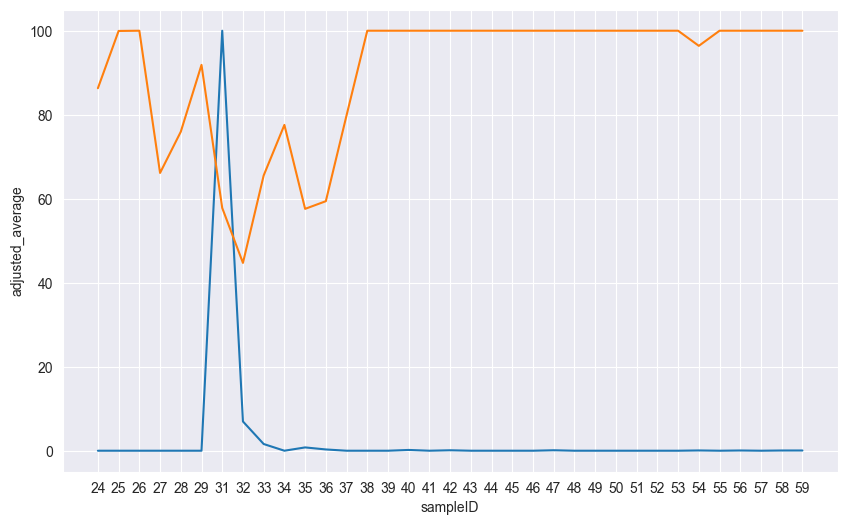

In [134]:
index = 8024
y = [x/np.max(alignment_result_correlation_adjusted.loc[index][6:])*100 for x in alignment_result_correlation_adjusted.loc[index][6:]]
fig, axs = plt.subplots(figsize = (10,6))
sns.lineplot(x = bio_data_refined['sampleID'].str[-2:], y = y )

sns.lineplot(x = bio_data_refined['sampleID'].str[-2:], y = bio_data_refined['adjusted_average'])
fig.savefig(os.path.join(working_dir, str(alignment_result_correlation_adjusted.loc[index]['pmz'])+'_'+str(alignment_result_correlation_adjusted.loc[index]['rt'])+'.png'))

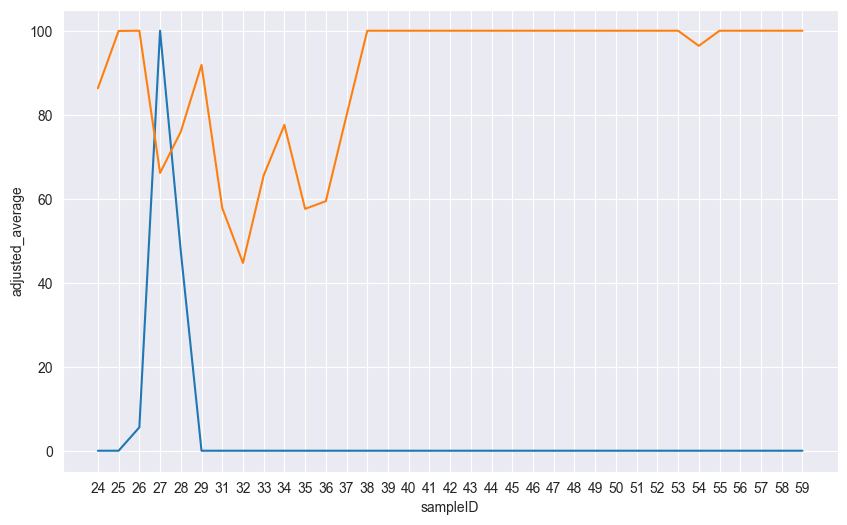

In [144]:
tt = find_feature(alignment_result_correlation_adjusted, mz=201.12767, rt=3.254341, mz_column='pmz', rt_column='rt')
index = tt.index[0]
y = [x / np.max(alignment_result_correlation_adjusted.loc[index][6:]) * 100 for x in
     alignment_result_correlation_adjusted.loc[index][6:]]
fig, axs = plt.subplots(figsize=(10, 6))
sns.lineplot(x=bio_data_refined['sampleID'].str[-2:], y=y)

sns.lineplot(x=bio_data_refined['sampleID'].str[-2:], y=bio_data_refined['adjusted_average'])
fig.savefig(os.path.join(working_dir, str(alignment_result_correlation_adjusted.loc[index]['pmz']) + '_' + str(
    alignment_result_correlation_adjusted.loc[index]['rt']) + '.png'))

In [141]:
quick_search_values(alignment_result_correlation_adjusted, 'pmz', 201.12767-0.01, 201.12767+0.01)

,pmz,rt,correlation,p_value,annotation,feature_type,1870_AX_M5P2_M7P1_M7_X24_P,1870_AX_M5P2_M7P1_M7_X25_P,1870_AX_M5P2_M7P1_M7_X26_P,1870_AX_M5P2_M7P1_M7_X27_P,...,1870_AX_M5P2_M7P1_M7_X50_P,1870_AX_M5P2_M7P1_M7_X51_P,1870_AX_M5P2_M7P1_M7_X52_P,1870_AX_M5P2_M7P1_M7_X53_P,1870_AX_M5P2_M7P1_M7_X54_P,1870_AX_M5P2_M7P1_M7_X55_P,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P


In [137]:
tt.index[0]

8024

In [135]:
alignment_result_correlation.to_csv(os.path.join(working_dir, 'correlation_round_1.csv'))